# Sec Certs Assignment

## 1st task: Run the code
Load data and convert to pandas dataset

In [64]:
from sec_certs.dataset import CCDataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dset = CCDataset.from_json("data/cc_november_23/dataset_cleaned.json")

dset_pandas = dset.to_pandas()

/Users/vladimirpenaz/PycharmProjects/thesis/sec_certs_assignment/.venv/lib/python3.12/site-packages/sec_certs/dataset/cc.py:90: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(value=np.nan)


## 2nd task: certificated per year

Get the number of certificates per year


In [65]:
print(dset_pandas.not_valid_before.dt.year.value_counts())

not_valid_before
2021    384
2022    358
2020    356
2017    330
2016    326
2019    326
2023    325
2012    304
2018    298
2015    283
2011    265
2014    257
2013    247
2007    225
2009    224
2010    221
2008    221
2006    171
2005    154
2004    101
2003     63
2002     50
2001     27
2000     22
1999     12
1998      2
1997      1
Name: count, dtype: int64


Plot the number of certificates per year

*I've considered multiple types of plots, but I've decided to use a bar plot because it's the most informative and easy to understand if we want to se the volume of certificates per year.*


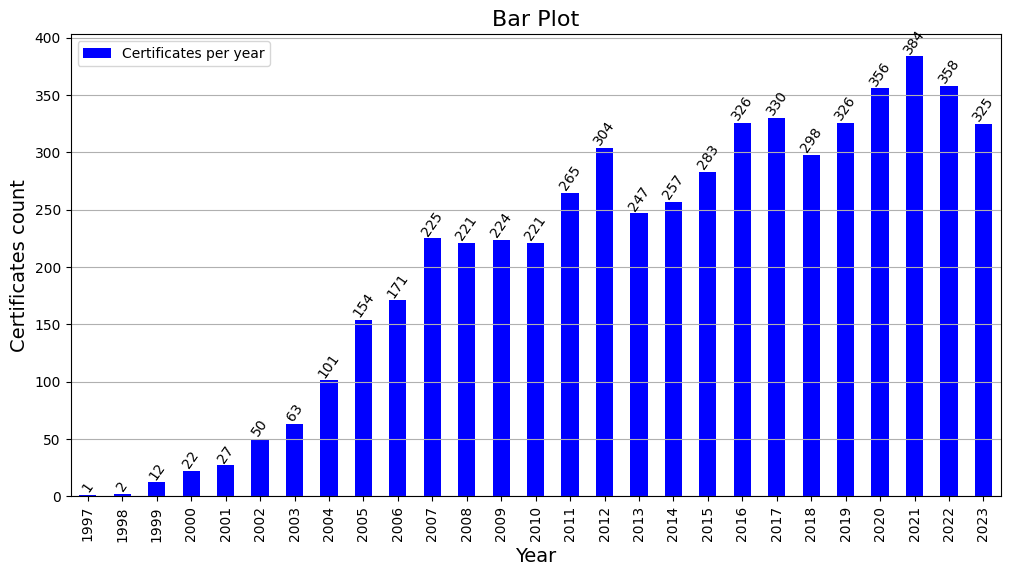

In [129]:

# Basic bar plot
# dset_pandas.not_valid_before.dt.year.value_counts().sort_index().plot.bar()

year_counts = dset_pandas.not_valid_before.dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = year_counts.plot.bar(color='blue', label='Certificates per year')

for i, v in enumerate(year_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', rotation=55)

plt.title('Bar Plot', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Certificates count', fontsize=14)
plt.legend()
plt.grid(True, axis='y')
plt.show()

*In case we want to see the trend of the number of certificates per year, i think it's better to combine a line plot with a scatter plot.*



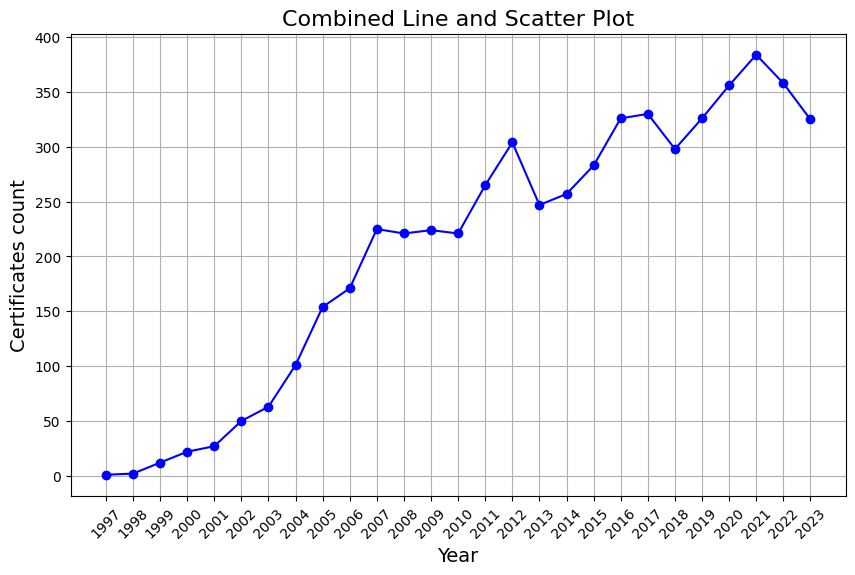

In [130]:
all_years = np.arange(dset_pandas.not_valid_before.dt.year.min(), 
                      dset_pandas.not_valid_before.dt.year.max() + 1)

year_counts = dset_pandas.not_valid_before.dt.year.value_counts().sort_index()
year_counts = year_counts.reindex(all_years, fill_value=0)

plt.figure(figsize=(10, 6))
year_counts.plot.line(marker='o', label='Certificates per year', color='blue')

plt.title('Combined Line and Scatter Plot', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Certificates count', fontsize=14)
plt.xticks(all_years, rotation=45)
plt.grid()
plt.show()

## 3rd task: Manufacturer name unification

### Hardcoded dictionaries for manufacturers unification
Patterns are mostly generated automatically.

Exceprions are added manually.

In [68]:
# Dictionary of manufacturers to be unified (code checks if manufacturer name contains any of the patterns)
manufacturer_patterns = {
    'apple': 'Apple',
    'appgate': 'AppGate',
    'arjo systems': 'Arjo Systems',
    'athena smartcard': 'Athena Smartcard',
    'atmel': 'Atmel',
    'atos': 'Atos',
    'bae systems': 'BAE Systems',
    'belkin': 'Belkin',
    'black box': 'Black Box',
    'blackberry': 'BlackBerry',
    'brocade' : 'Brocade Communications Systems',
    'bull s.a.': 'Bull S.A.',
    'canon': 'Canon',
    'check point': 'Check Point Software Technologies',
    'ciena': 'Ciena',
    'cisco': 'Cisco Systems',
    'citrix': 'Citrix Systems',
    'continental': 'Continental',
    'cryptek': 'Cryptek',
    'dell': 'Dell',
    'entrust': 'Entrust',
    'fidelis': 'Fidelis',
    'fortinet': 'Fortinet',
    'fujifilm': 'Fujifilm',
    'fujitsu': 'Fujitsu',
    'gemalto': 'Gemalto',
    'gemplus': 'Gemplus',
    'general dynamics': 'General Dynamics',
    'genua': 'Genua',
    'hangzhou': 'Hangzhou',
    'hewlett': 'Hewlett Packard (HP)',
    'hitachi': 'Hitachi',
    'huawei': 'Huawei',
    'idemia': 'Idemia',
    'infineon': 'Infineon',
    'ingenico': 'Ingenico Healthcare',
    'juniper networks': 'Juniper Networks',
    'koco' : 'KoCo Connector',
    'konica minolta': 'Konica Minolta',
    'kyocera': 'KYOCERA',
    'lexmark': 'Lexmark',
    'lg electronics': 'LG Electronics',
    'masktech' : 'MaskTech',
    'mcafee': 'McAfee',
    'microsoft': 'Microsoft',
    'morpho' : 'Morpho',
    'motorola': 'Motorola',
    'netiq' : 'NetIQ',
    'nokia': 'Nokia',
    'nxp semiconductors': 'NXP Semiconductors',
    'oberthur' : 'Oberthur',
    'openlimit' : 'OpenLimit',
    'oracle': 'Oracle',
    'panasonic' : 'Panasonic',
    'philips': 'Philips',
    'red hat': 'Red Hat',
    'renesas' : 'Renesas',
    'ricoh': 'Ricoh',
    'rohde' : 'Rohde & Schwarz',
    'rsa security' : 'RSA Security',
    'safran' : 'Safran',
    'sagem': 'Sagem',
    'samsung': 'Samsung',
    'secure computing' : 'Secure Computing',
    'senetas' : 'Senetas',
    'sharp': 'Sharp',
    'siemens' : 'Siemens',
    'sonicwall' : 'SonicWall',
    'sony': 'Sony',
    'stmicroelectronics': 'STMicroelectronics',
    'suse' : 'SUSE',
    't-systems' : 'T-Systems',
    'tenable': 'Tenable',
    'thales': 'Thales',
    'thinklogical' : 'Thinklogical',
    'toshiba' : 'Toshiba',
    'trend micro' : 'Trend Micro',
    'trustwave' : 'Trustwave',
    'utimaco' : 'Utimaco',
    'vertiv' : 'Vertiv',
    'watchguard' : 'WatchGuard',
    'xerox': 'Xerox',
}

# Special dictionary with exact cases, beacuse the company name is to shors so it can 
# be misinterpreted when used as an pattern
manufacturer_mapping = {
    'nxp': 'NXP Semiconductors',

    'hp': 'Hewlett Packard (HP)',
    'hp inc.': 'Hewlett Packard (HP)', 
    'hp, inc': 'Hewlett Packard (HP)',
    'hp tippingpoint': 'Hewlett Packard (HP)',

    'ibm': 'IBM Corporation',
    'ibm informationssysteme deutschland gmbh': 'IBM Corporation',
    'ibm internet security systems': 'IBM Corporation',
    'ibm united kingdom limited': 'IBM Corporation',
    'ibm deutschland entwicklung gmbh': 'IBM Corporation',
    'ibm canada ltd.': 'IBM Corporation',
    'international business machine (ibm) corporation': 'IBM Corporation',

    'emc documentum': 'EMC Corporation',
    'dell emc': 'EMC Corporation',
    'emc': 'EMC Corporation',

    'lg cns': 'LG Electronics',
    'lg n-sys': 'LG Electronics',
    'lg': 'LG Electronics',
    'f5': 'F5 Networks',

    'owl computing technologies': 'OWL Systems',
    'owl systems inc.': 'OWL Systems', 
    'owl cyber defense solutions': 'OWL Systems',

    'st': 'STMicroelectronics',

    'bmc': 'BMC Software',

    'sap': 'SAP',
    'sap ag': 'SAP',
}

#Special cases for comma seperation
comma_exceptions = {
    'Valiant Communications Limited 71/1 Shivaji Marg, New Delhi-110015, India': 'Valiant Communications',
    'Haltdos.com Private Limited E \u2013 52, Sector -3, Noida, UP, 201301, India': 'Haltdos Private',
    'Tejas Networks Limited Plot no 25, J. P. Software Park, Electronic City, Phase I, Hosur Road, Bangalore 560100, India': 'Tejas Networks',
    'ADVA OPTICAL NETWORKING SE, Fraunhoferstr.9a 82152 Martinsried, Munich, Germany' : 'ADVA Optical Networking',
    'ECI Telecom Ltd., 30 Hasivim Street, Petach Tikvah, 4959388, Israel' : 'ECI Telecom',
    'Cisco Systems, Inc. 170 West Tasman Dr. San Jose, CA 95134-1706 USA' : 'Cisco Systems',
    'DataPower Technology, Inc. a wholly owned subsidiary of IBM Corporation' : 'IBM Corporation',
    'Research Industrial Systems Engineering (RISE) Forschungs-, Entwicklungs- und Gro\u00dfprojekteberatung GmbH': 'Research Industrial Systems Engineering',
    'RSA, The Security Division of EMC': 'EMC Corporation',
    'NEC SCAC / NEC' : 'NEC Corporation',    
    'NEC Smart Card IC development Section, Kumamoto (Japan)' : 'NEC Corporation',
    'NEC Yamaguchi Ltd, NEC SCAC' : 'NEC Corporation',
    'Pacific Star Communications, Inc. (dba PacStar)' : 'Pacific Star Communications',
    'Breach Security, Inc. (Originally sponsored by Gillian Technologies, Inc.)' : 'Breach Security',
    'Shanghai Huahong Integrated Circuit Co., ltd (SHHIC)' : 'Shanghai Huahong Integrated Circuit',
    'Secure Data In Motion, Inc.dba Sigaba' : 'Secure Data In Motion',
    'Israel Aircraft Industries Ltd / MLM Division' : 'Israel Aircraft Industries',
    
    'Samsung Electronics Co., Ltd. / Trusted Labs' : 'Samsung / Trusted Labs',
    'MORPHO/Inside Secure' : 'MORPHO / Inside Secure',
    'The Bank of Tokyo-Mitsubishi/ MITSUBISHI ELECTRIC INFORMATION SYSTEMS CORPORATION' : 'Mitsubishi',
    'Bull S.A. and IBM Informationssysteme Deutschland GmbH' : 'Bull S.A. / IBM Corporation ',

}

#Useless suffixes, to be removed
suffixes_to_remove = [
        '.ltd',
        'ltd.',
        'ltd',
        'ltd (dmt)',
    
        'inc.',
        'inc',

        'llc',
        'llc.',
        'l.l.c.',

        'gmbh',

        'co.',

        'as',
        'as.',

        'sa',
        's.a.',

        'l.p.',

        'sl',
        'sl.',
        's.l',
        's.l.',

        'incorporated',
    ]

 **!!!Uniufy using CPE values - worse results (better not to use)!!!**

In [69]:
# from sec_certs.sample.cpe import CPE


# processed_manufacturers_cpe = []
# for manufacturer, cpe_matches in zip(dset_pandas['manufacturer'], dset_pandas['cpe_matches']):
#     if pd.notna(cpe_matches):
#         for element in cpe_matches:
#             cpe_item = CPE(1, element)
#             processed_manufacturers_cpe.append(cpe_item.vendor)
#             break
#     else:
#         processed_manufacturers_cpe.append(manufacturer.lower())

# assert len(processed_manufacturers_cpe) == len(dset_pandas.index), "Processed manufacturers length doesn't match dataframe length"

# # Create new dataframe column
# dset_pandas['manufacturer'] = processed_manufacturers_cpe

### Functions for manufacturer name processing:
- pre_process_manufacturer: Removes common company suffixes (GmbH, Inc, etc) from manufacturer names
- unify_manufacturer: Maps manufacturer names to standardized versions using predefined mappings and patterns
- process_multiple_manufacturers: Handles cases where multiple manufacturers are listed with ' / ' separator


In [70]:
def pre_process_manufacturer(manufacturer):
    manufacturer_items = [item.strip() for item in manufacturer.split(',')]
    for manufacturer_item in manufacturer_items:
        if manufacturer_item.strip(' ').lower() in suffixes_to_remove:
            manufacturer_items.remove(manufacturer_item)
    return ' / '.join(manufacturer_items)


def unify_manufacturer(manufacturer):
    if manufacturer.lower() in manufacturer_mapping:
       return manufacturer_mapping[manufacturer.lower()]
        
    manufacturer_lower = manufacturer.lower().strip(' ')
    for pattern, replacement in manufacturer_patterns.items():
        if pattern in manufacturer_lower:
            return replacement
            
    return manufacturer


def process_multiple_manufacturers(manufacturer):
    multiple_manufacturers = manufacturer.split(' / ')
    result = []
    for single_manufacturer in multiple_manufacturers:
        result.append(unify_manufacturer(single_manufacturer))
    return ' / '.join(result)



This code block standardizes manufacturer names across the dataset. It processes each manufacturer entry by checking against predefined mappings, handling special cases with commas and multiple manufacturers (separated by '/'), and applies consistent formatting. The final results are saved to verify the standardization worked correctly.

In [71]:
processed_manufacturers = []


for manufacturer in dset_pandas['manufacturer']:
    manufacturer = str(manufacturer) 
    
    if manufacturer in comma_exceptions:
        processed_manufacturers.append(comma_exceptions[manufacturer])
        continue


    manufacturer = pre_process_manufacturer(manufacturer)
    # Handle entries containing " / "
    if ' / ' in manufacturer:
        processed_manufacturers.append(process_multiple_manufacturers(manufacturer))

    else:
        processed_manufacturers.append(unify_manufacturer(manufacturer))


# Verify lengths match before task
assert len(processed_manufacturers) == len(dset_pandas.index), "Processed manufacturers length doesn't match dataframe length"


dset_pandas['manufacturer'] = processed_manufacturers

# Get counts and save to CSV - just to check the results

# manufacturer_counts = dset_pandas['manufacturer'].value_counts()
# manufacturer_counts.to_csv('ceritificates_per_manufacturer.csv', header=True)

#### Plot top 20 manufacturers of all time (only if they are only manufacturers, not cooperation)

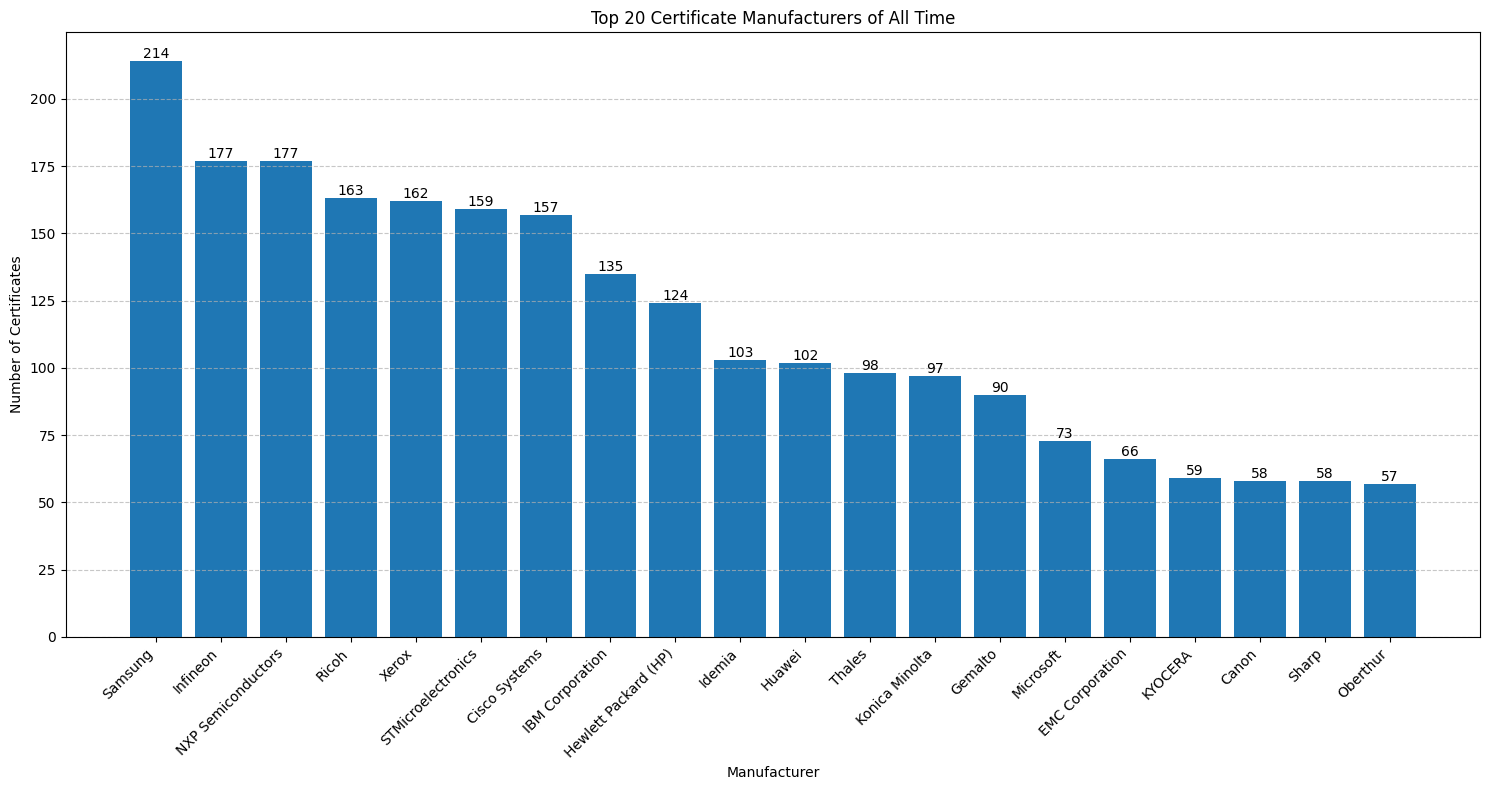

In [72]:
plt.figure(figsize=(15, 8))
top_20_manufacturers = dset_pandas['manufacturer'].value_counts().head(20)

bars = plt.bar(range(len(top_20_manufacturers)), top_20_manufacturers.values)

plt.xticks(range(len(top_20_manufacturers)), top_20_manufacturers.index, rotation=45, ha='right')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Certificates')
plt.title('Top 20 Certificate Manufacturers of All Time')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Plot top manufacturer by number of issued certificates per year

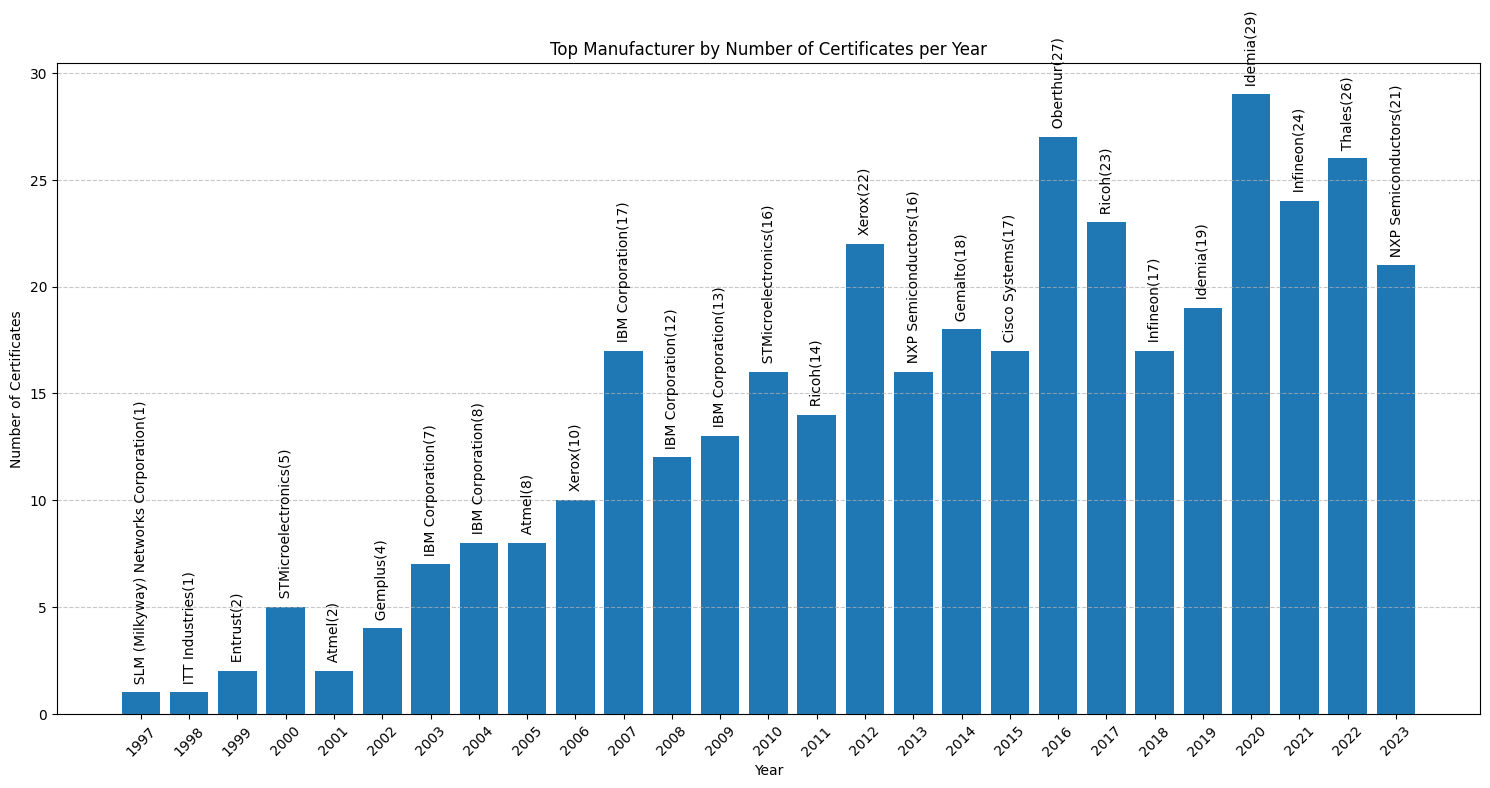

In [73]:
yearly_top_manufacturers = (
    dset_pandas.groupby([dset_pandas['not_valid_before'].dt.year, 'manufacturer'])
    .size()
    .reset_index(name='count')
    .sort_values(['not_valid_before', 'count'], ascending=[True, False])
    .groupby('not_valid_before')
    .first()
    .reset_index()
)

plt.figure(figsize=(15, 8))

bars = plt.bar(yearly_top_manufacturers['not_valid_before'], 
               yearly_top_manufacturers['count'])

plt.xlabel('Year')
plt.ylabel('Number of Certificates')
plt.title('Top Manufacturer by Number of Certificates per Year')

plt.xticks(yearly_top_manufacturers['not_valid_before'], rotation=45)

for idx, row in yearly_top_manufacturers.iterrows():
    plt.text(row['not_valid_before'], row['count'], 
             f"  {row['manufacturer']}({row['count']})",
             ha='center', va='bottom' , rotation=90)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### Plot certificates per year for a specific manufacturer (optional: include cooperation)

In [74]:
# Choose the manufacturer to plot
# manufacturer_to_plot = 'Samsung'
# manufacturer_to_plot = 'Infineon'
# manufacturer_to_plot = 'NXP Semiconductors'
# manufacturer_to_plot = 'Gemalto'
manufacturer_to_plot = 'Ricoh'
# manufacturer_to_plot = 'Hewlett Packard (HP)'


# Do you want to include alsi items, where the manufacturer is a part of the cooperation?
# fe: Gemalto / NXP Semiconductors
include_cooperations = True
# include_cooperations = False

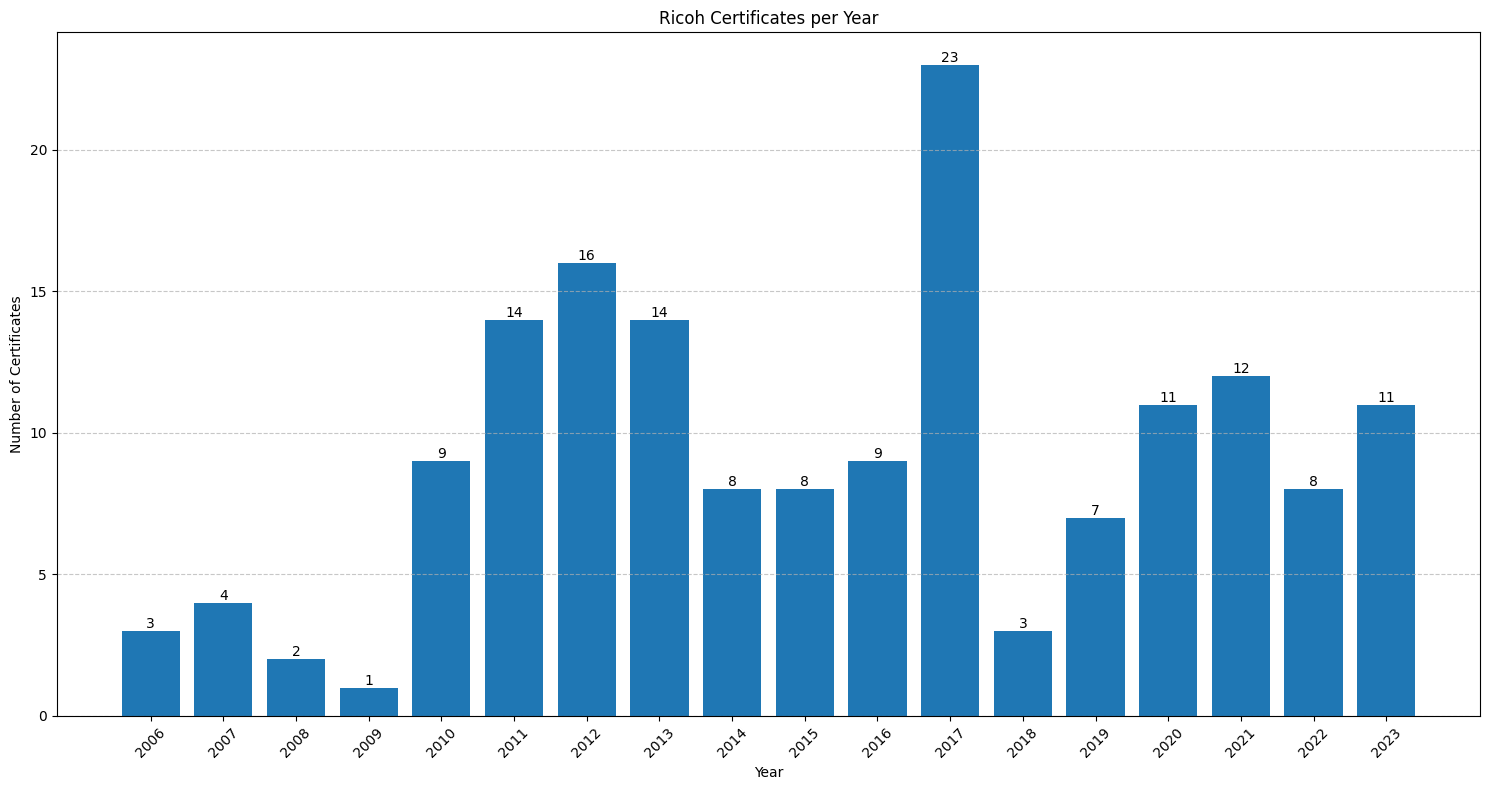

In [75]:
if include_cooperations:
    manufacturer_certs = dset_pandas[dset_pandas['manufacturer'].str.contains(manufacturer_to_plot, case=False)]
else:
    manufacturer_certs = dset_pandas[dset_pandas['manufacturer'] == manufacturer_to_plot]

manufacturer_yearly = (
    manufacturer_certs.groupby(manufacturer_certs['not_valid_before'].dt.year)
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(15, 8))

bars = plt.bar(manufacturer_yearly['not_valid_before'], manufacturer_yearly['count'])

plt.xlabel('Year')
plt.ylabel('Number of Certificates')
plt.title(f'{manufacturer_to_plot} Certificates per Year')

plt.xticks(manufacturer_yearly['not_valid_before'], rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Task 4: Bonus - Other trends in the data



I have noticed, in data set is security level value. It contains a set of values, describing the security assurance level of the certificate. I've decided to plot the number of certificates with security levels per year in contrast to the total number of certificates per year. Combination of the bar plot and the scatter is great option to show the trend.



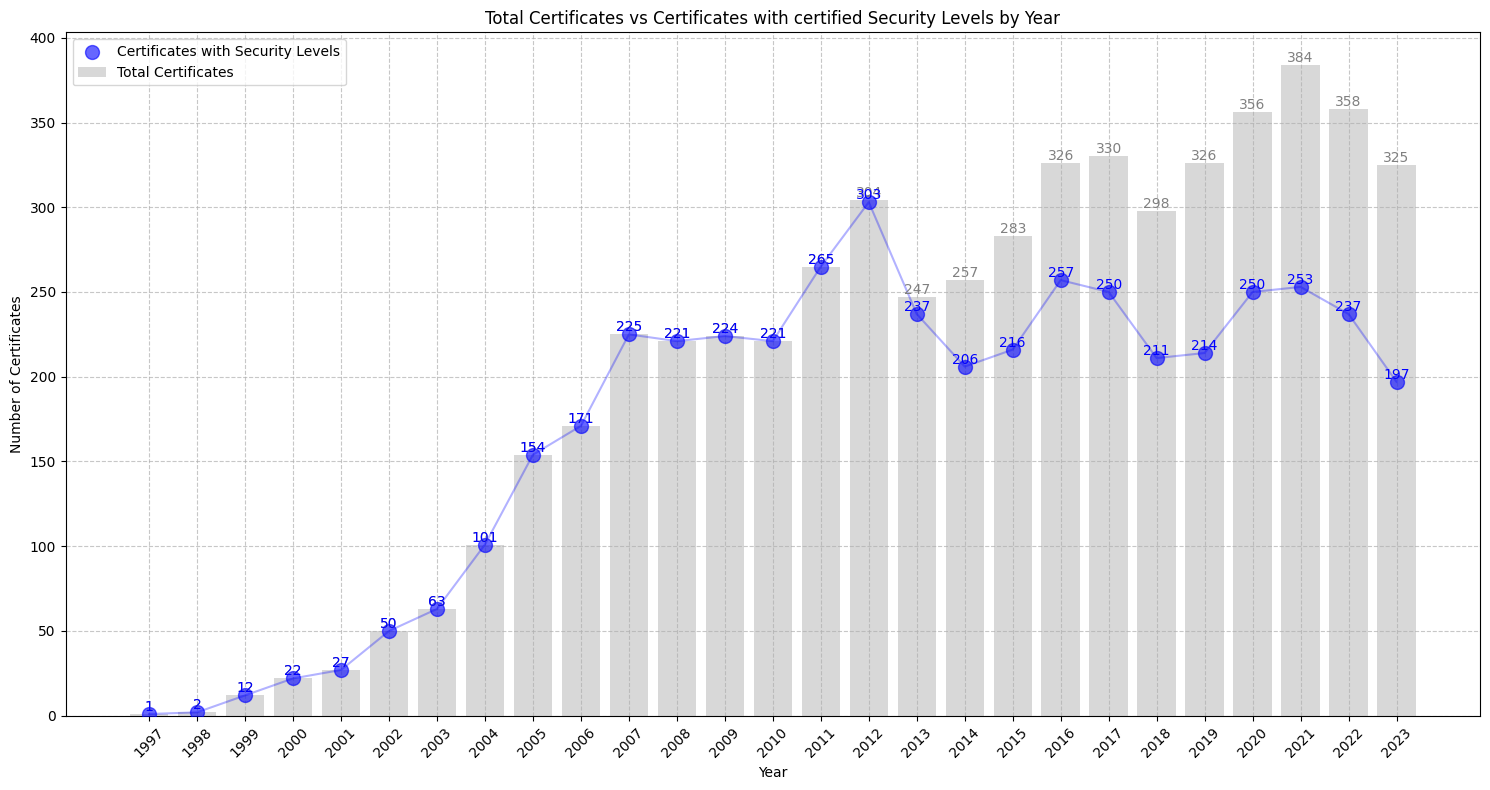

In [127]:
certs_with_levels = dset_pandas[dset_pandas['security_level'].apply(lambda x: len(x) > 0)]

yearly_total = (
    dset_pandas.groupby(dset_pandas['not_valid_before'].dt.year)
    .size()
    .reset_index(name='total')
)

yearly_with_levels = (
    certs_with_levels.groupby(certs_with_levels['not_valid_before'].dt.year)
    .size()
    .reset_index(name='with_levels')
)

yearly_counts = yearly_total.merge(yearly_with_levels, on='not_valid_before', how='left')
yearly_counts['with_levels'] = yearly_counts['with_levels'].fillna(0)

plt.figure(figsize=(15, 8))

bars = plt.bar(
    yearly_counts['not_valid_before'],
    yearly_counts['total'],
    alpha=0.3,
    color='gray',
    label='Total Certificates'
)

plt.plot(
    yearly_counts['not_valid_before'],
    yearly_counts['with_levels'],
    color='blue',
    alpha=0.3,
    zorder=2
)

plt.scatter(
    yearly_counts['not_valid_before'],
    yearly_counts['with_levels'],
    color='blue',
    alpha=0.6,
    s=100,
    zorder=3,
    label='Certificates with Security Levels'
)

for i, row in yearly_counts.iterrows():
    plt.text(
        row['not_valid_before'],
        row['total'],
        f"{int(row['total'])}",
        ha='center',
        va='bottom',
        color='gray'
    )
    plt.text(
        row['not_valid_before'],
        row['with_levels'],
        f"{int(row['with_levels'])}",
        ha='center',
        va='bottom',
        color='blue'
    )

plt.xlabel('Year')
plt.ylabel('Number of Certificates')
plt.title('Total Certificates vs Certificates with certified Security Levels by Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_counts['not_valid_before'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


I was also curious to see the most popular security levels per year. I've decided to plot most popular security level standardper year.


/var/folders/v8/0xjz__pn3knd8tt17kddv61w0000gn/T/ipykernel_2608/3864244580.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(unique_levels)))


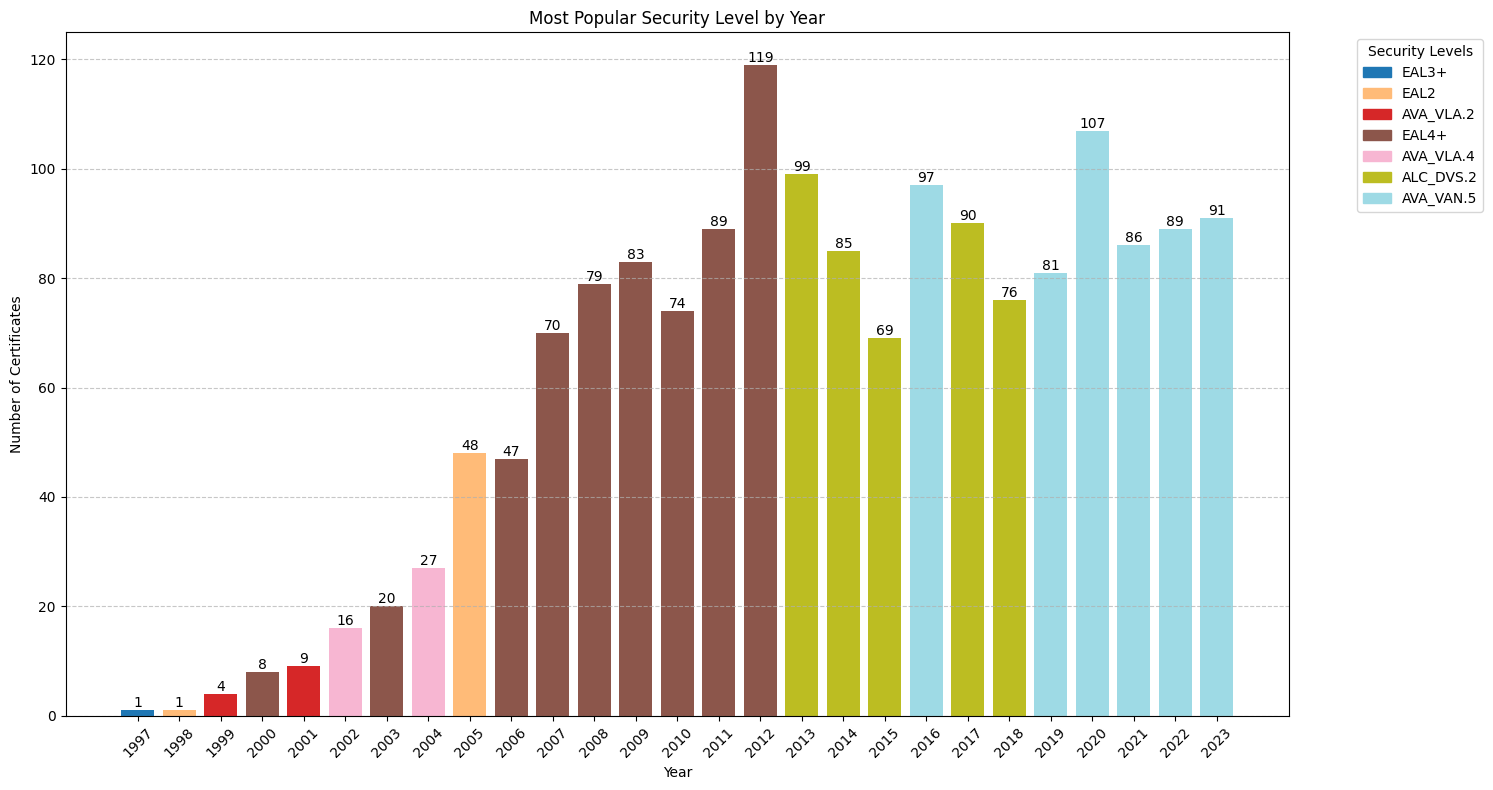

In [126]:
security_levels = dset_pandas.explode('security_level')

yearly_most_popular = (
    security_levels.groupby([
        security_levels['not_valid_before'].dt.year, 
        'security_level']
    )
    .size()
    .reset_index(name='count')
    .sort_values(['not_valid_before', 'count'], ascending=[True, False])
    .groupby('not_valid_before')
    .first()
    .reset_index()
)

unique_levels = yearly_most_popular['security_level'].unique()
colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(unique_levels)))
color_map = dict(zip(unique_levels, colors))

plt.figure(figsize=(15, 8))

for i, row in yearly_most_popular.iterrows():
    plt.bar(
        row['not_valid_before'],
        row['count'],
        color=color_map[row['security_level']]
    )

for i, row in yearly_most_popular.iterrows():
    plt.text(
        row['not_valid_before'], 
        row['count'],
        f"{int(row['count'])}",
        ha='center',
        va='bottom'
    )

plt.xlabel('Year')
plt.ylabel('Number of Certificates')
plt.title('Most Popular Security Level by Year')
plt.xticks(yearly_most_popular['not_valid_before'], rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

legend_elements = [plt.Rectangle((0,0),1,1, color=color) 
                  for color in color_map.values()]
plt.legend(legend_elements, color_map.keys(), 
          title='Security Levels',
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In this case I wanted to the trend security level in context of EAL levels. I've decided to plot the number of certificates with each EAL standard level per year I've merged each level with + version. (We can see that EAL4/EAL4+ is the most popular level and EAL5/EAL5+ and EAL6/EAL6+ has rising trend)

/var/folders/v8/0xjz__pn3knd8tt17kddv61w0000gn/T/ipykernel_2608/3687231516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eal_levels['standard_level'] = eal_levels['security_level'].apply(standardize_eal)


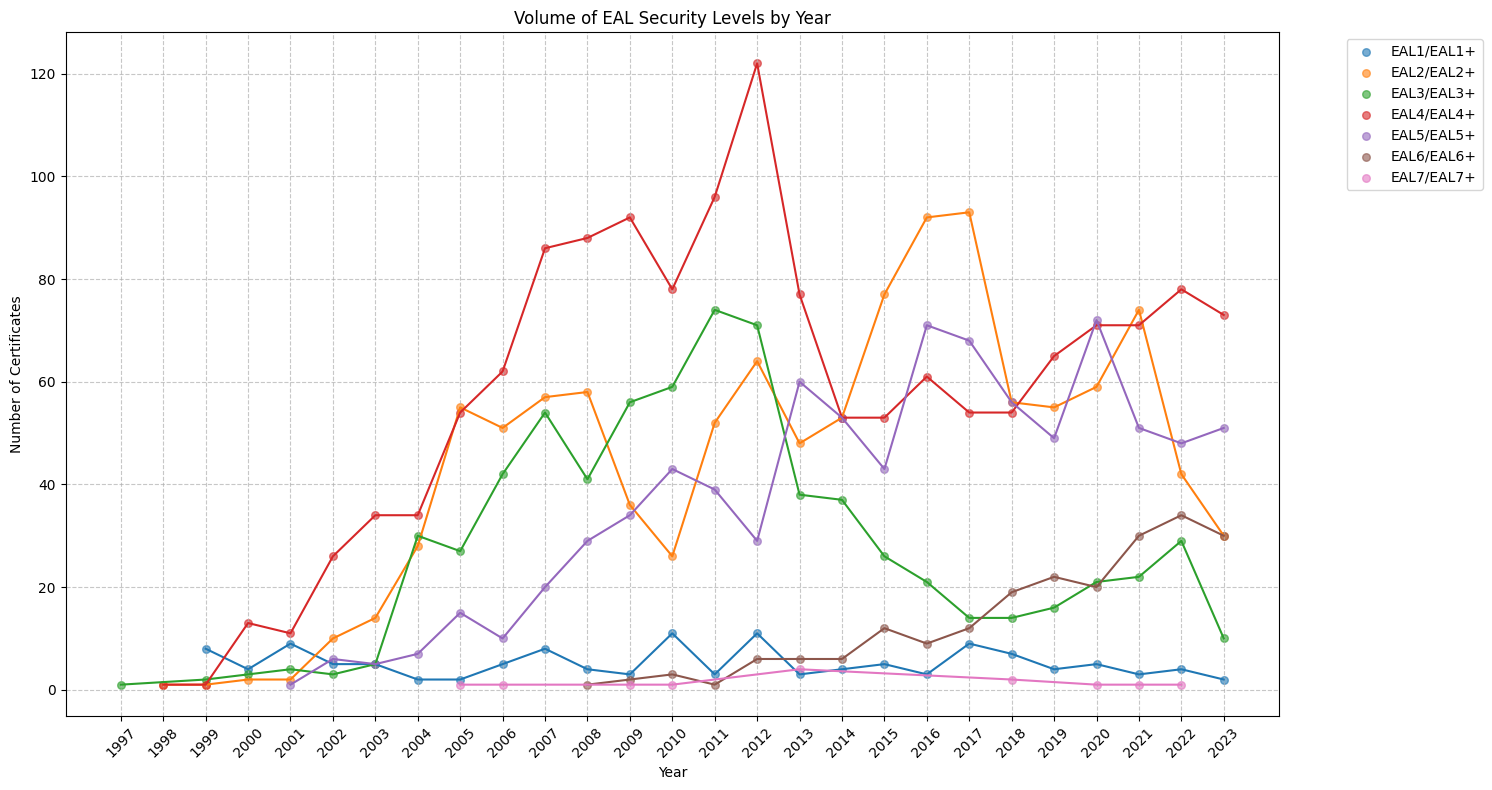

In [128]:
eal_levels = security_levels[security_levels['security_level'].str.contains('EAL', na=False)]

def standardize_eal(level):
    base_level = level.rstrip('+')
    return base_level

eal_levels['standard_level'] = eal_levels['security_level'].apply(standardize_eal)

yearly_eal_counts = (
    eal_levels.groupby([
        eal_levels['not_valid_before'].dt.year,
        'standard_level'
    ])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(15, 8))

years = sorted(yearly_eal_counts['not_valid_before'].unique())

for eal in sorted(yearly_eal_counts['standard_level'].unique()):
    mask = yearly_eal_counts['standard_level'] == eal
    data = yearly_eal_counts[mask]
    
    plt.scatter(
        data['not_valid_before'],
        data['count'],
        label=f"{eal}/{eal}+",
        s=30,
        alpha=0.6
    )
    
    plt.plot(
        data['not_valid_before'],
        data['count'],
        alpha=1,
    )

plt.xlabel('Year')
plt.ylabel('Number of Certificates')
plt.title('Volume of EAL Security Levels by Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(years, rotation=45)

plt.tight_layout()
plt.show()

Same as in previous case I wanted to see the trend of occurence of ALC standards per year. 
 (We can see that ALC_DVS.2 with positive trend)

/var/folders/v8/0xjz__pn3knd8tt17kddv61w0000gn/T/ipykernel_2608/900058137.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alc_levels['alc_info'] = alc_levels['security_level'].apply(extract_alc_level)
/var/folders/v8/0xjz__pn3knd8tt17kddv61w0000gn/T/ipykernel_2608/900058137.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alc_levels[['alc_type', 'alc_level']] = pd.DataFrame(alc_levels['alc_info'].tolist(), index=alc_levels.index)
/var/folders/v8/0xjz__pn3knd8tt17kddv61w0000gn/T/ipykernel_2608/90005

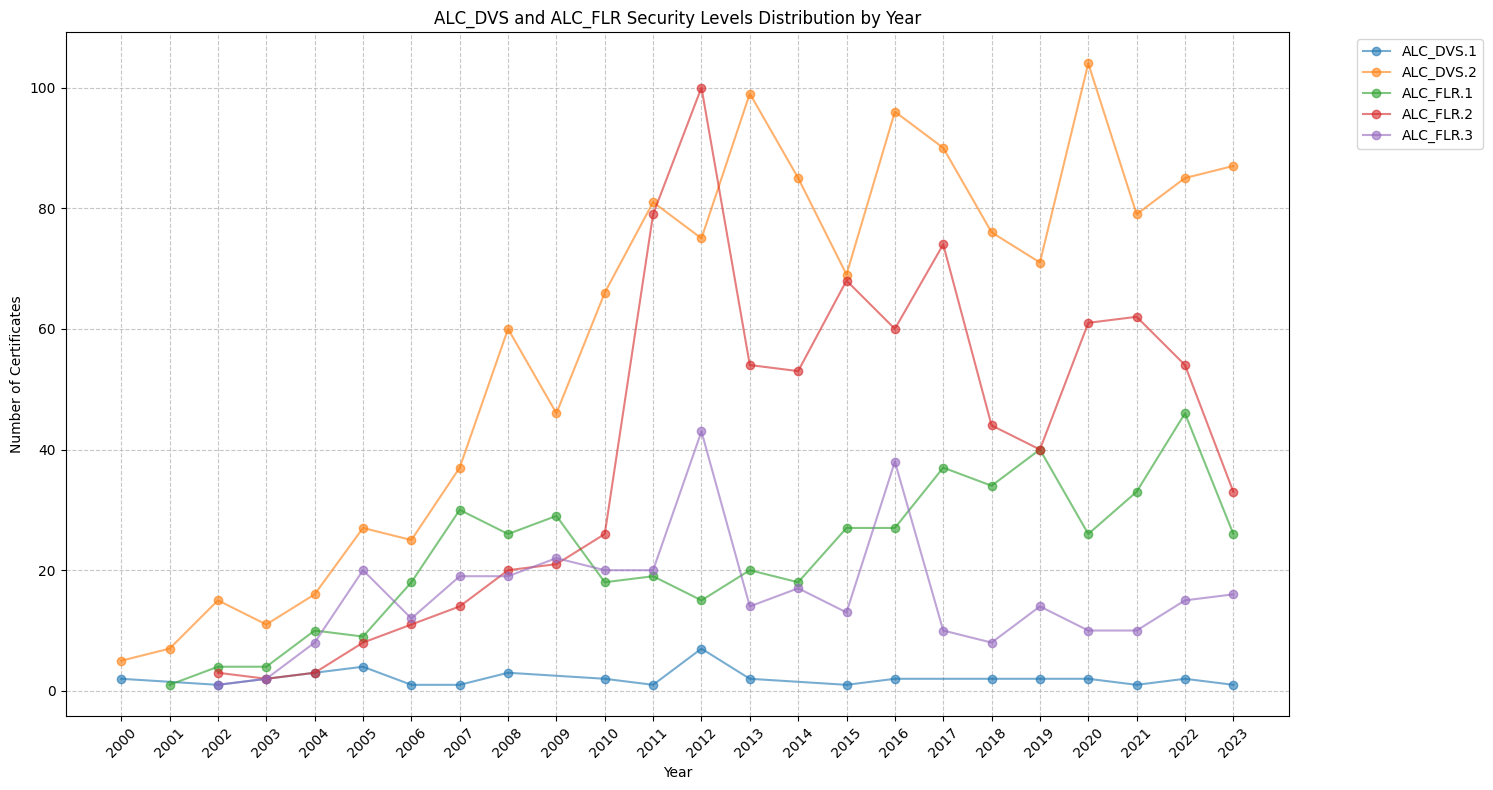

In [118]:
alc_levels = dset_pandas[dset_pandas['security_level'].apply(lambda x: any(('ALC_DVS' in level or 'ALC_FLR' in level) for level in x))]

def extract_alc_level(security_levels):
    for alc_type in ['DVS', 'FLR']:
        levels = [level for level in security_levels if f'ALC_{alc_type}' in level]
        if levels:
            return (alc_type, levels[0].split('.')[1])
    return None

alc_levels['alc_info'] = alc_levels['security_level'].apply(extract_alc_level)
alc_levels[['alc_type', 'alc_level']] = pd.DataFrame(alc_levels['alc_info'].tolist(), index=alc_levels.index)

plt.figure(figsize=(15, 8))
yearly_counts = alc_levels.groupby([alc_levels['not_valid_before'].dt.year, 'alc_type', 'alc_level']).size().reset_index(name='count')

for alc_type in ['DVS', 'FLR']:
    type_data = yearly_counts[yearly_counts['alc_type'] == alc_type]
    for level in sorted(type_data['alc_level'].unique()):
        data = type_data[type_data['alc_level'] == level]
        plt.plot(data['not_valid_before'], data['count'], 'o-', label=f"ALC_{alc_type}.{level}", alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Number of Certificates')
plt.title('ALC_DVS and ALC_FLR Security Levels Distribution by Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(sorted(yearly_counts['not_valid_before'].unique()), rotation=45)
plt.tight_layout()
plt.show()